In [141]:
import pandas as pd
import numpy as np

In [125]:
df = pd.read_csv('excelview.csv')


In [126]:
df2 = df.dropna()
df2

,Unnamed: 0,Address,Beds_Min,Beds_Max,Baths_Min,Baths_Max,Sqft_Min,Sqft_Max,Lat,Lon,Distance,Rent,Rent_max,Neighborhood,City,Walk Score,Transit Score,Bike Score,Population
0,0,2190 E 11th Ave,0,3,1.0,2.0,516.0,1331.0,39.733230,-104.961560,0.590335,1638,3341,Cheesman Park,Cheesman Park,85.0,53.0,90.0,7984.0
4,4,2315 E 12th Ave,1,2,1.0,1.0,599.0,828.0,39.735298,-104.959447,0.805370,1300,1600,Congress Park,Congress Park,80.0,51.0,88.0,10239.0
13,13,925-995 Humboldt St,1,2,1.0,1.0,488.0,755.0,39.730660,-104.969870,0.895747,1311,1706,Cheesman Park,Cheesman Park,85.0,53.0,90.0,7984.0
17,17,1330 Gaylord St,1,2,1.0,2.0,641.0,1047.0,39.737243,-104.960672,1.022370,1465,1855,Cheesman Park,Cheesman Park,85.0,53.0,90.0,7984.0
18,18,1901 E 13th Ave,0,2,1.0,1.0,260.0,590.0,39.736950,-104.964350,1.057026,1100,1600,Cheesman Park,Cheesman Park,85.0,53.0,90.0,7984.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,188,4750 E Cherry Creek South Dr,1,3,1.0,2.0,687.0,1429.0,39.702639,-104.932119,3.697704,1200,2615,Washington Virginia Vale,Washington Virginia Vale,67.0,44.0,77.0,12838.0
189,189,818-848 S Dexter St,1,2,1.0,2.0,580.0,985.0,39.701790,-104.932290,3.761213,1130,1465,Washington Virginia Vale,Washington Virginia Vale,67.0,44.0,77.0,12838.0
191,191,878 S Dexter St,0,2,1.0,2.0,500.0,1080.0,39.700560,-104.932380,3.863796,1007,1041,Washington Virginia Vale,Washington Virginia Vale,67.0,44.0,77.0,12838.0
193,193,3331 N Race St,2,2,1.5,1.5,950.0,950.0,39.763875,-104.963555,3.994682,2195,2195,Cole,Cole,82.0,54.0,92.0,4646.0


In [160]:
df[166:170]

,Unnamed: 0,Address,Beds_Min,Beds_Max,Baths_Min,Baths_Max,Sqft_Min,Sqft_Max,Lat,Lon,Distance,Rent,Rent_max,Neighborhood,City,Walk Score,Transit Score,Bike Score,Population
166,166,825 Dahlia St,0,2,1.0,2.0,370.0,800.0,39.729895,-104.931956,2.403844,1260,1570,Hale,Hale,71.0,48.0,77.0,6942.0
167,167,1400 Clermont St # 1400-3,2,2,1.0,1.0,1000.0,1000.0,39.738499,-104.934694,2.452666,1550,1550,Bellevue,NaN,NaN,NaN,NaN,NaN
168,168,2150-2170 Franklin St,2,2,1.0,1.0,650.0,650.0,39.749280,-104.968060,2.459118,1200,1275,City Park West,City Park West,85.0,55.0,95.0,4854.0
169,169,351 S Jackson St,0,2,1.0,2.5,595.0,1680.0,39.709791,-104.942912,2.501861,1476,4154,Belcaro,Belcaro,64.0,42.0,84.0,4215.0


In [127]:
foam = df2[["Rent", "Beds_Max","Baths_Min","Sqft_Min","Sqft_Max", "Walk Score", "Transit Score", "Bike Score"]]
foam = foam.dropna()
foam.head()

,Rent,Beds_Max,Baths_Min,Sqft_Min,Sqft_Max,Walk Score,Transit Score,Bike Score
0,1638,3,1.0,516.0,1331.0,85.0,53.0,90.0
4,1300,2,1.0,599.0,828.0,80.0,51.0,88.0
13,1311,2,1.0,488.0,755.0,85.0,53.0,90.0
17,1465,2,1.0,641.0,1047.0,85.0,53.0,90.0
18,1100,2,1.0,260.0,590.0,85.0,53.0,90.0


In [128]:
X = foam[["Beds_Max","Baths_Min","Sqft_Min","Sqft_Max", "Walk Score", "Transit Score", "Bike Score"]]
y = foam["Rent"].values.reshape(-1, 1)
print(X.shape, y.shape)

(65, 7) (65, 1)


In [129]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [130]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [131]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)


### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.8952218794180012
Testing Score: 0.7367167405522042


Text(0.5, 1.0, 'Residual Plot')

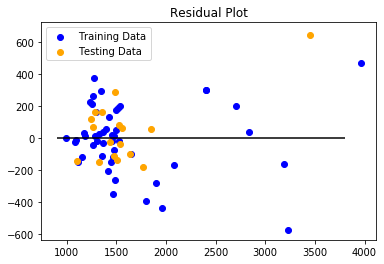

In [132]:
# Plot the Residuals for the Training and Testing data
import matplotlib.pyplot as plt
### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION

In [133]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [145]:
X_test

,Beds_Max,Baths_Min,Sqft_Min,Sqft_Max,Walk Score,Transit Score,Bike Score
168,2,1.0,650.0,650.0,85.0,55.0,95.0
188,3,1.0,687.0,1429.0,67.0,44.0,77.0
0,3,1.0,516.0,1331.0,85.0,53.0,90.0
122,2,1.0,650.0,850.0,71.0,48.0,77.0
19,2,1.0,860.0,860.0,80.0,51.0,88.0
189,2,1.0,580.0,985.0,67.0,44.0,77.0
36,2,1.0,450.0,1020.0,85.0,53.0,90.0
29,1,1.0,425.0,487.0,85.0,53.0,90.0
198,3,4.0,1619.0,2010.0,60.0,47.0,80.0
86,2,1.0,758.0,1387.0,80.0,49.0,79.0


In [156]:
from sklearn.metrics import mean_squared_error, r2_score

input_beds = 2
input_baths = 1
input_sqft_min = 650
input_sqft_max = 650
input_walk = 85
input_transit = 55
input_bike = 95

input_list = [[input_beds, input_baths, input_sqft_min, input_sqft_max, input_walk, input_transit, input_bike]]

#input_list = [["input_beds, input_baths", "input_sqft_min", "input_sqft_max", "input_walk", "input_transit", "input_bike"]]

input_df = pd.DataFrame(input_list, columns =["input_beds", "input_baths", "input_sqft_min", "input_sqft_max", "input_walk", "input_transit", "input_bike"]) 

# Use our model to make predictions
predicted = model.predict(input_df)

# Score the predictions with mse and r2
# mse = mean_squared_error(y_test, predicted)
# r2 = r2_score(y_test, predicted)

# print(f"Mean Squared Error (MSE): {mse}")
# print(f"R-squared (R2 ): {r2}")
print(predicted)

ValueError: Found input variables with inconsistent numbers of samples: [17, 1]

In [153]:
len(X_test)

17

In [135]:
#any property that comes availabel to rent between now and project time can test those against model--overpriced? underpriced?
#don't use all data - some use for training and testing, then use rest to see prediction vs actual
#importance of features
#gridsearach